# Importing header files

In [32]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

# Loading the data and removing unnecessary columns

In [67]:
df = pd.read_csv('Advertising.csv')
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [68]:
df = df.drop(['Unnamed: 0'], axis=1)
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


# Checking for null values

In [69]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualizing the data

# Linear Model Plot

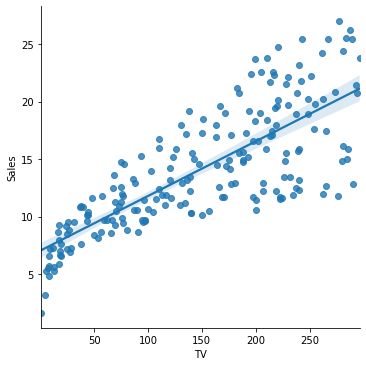

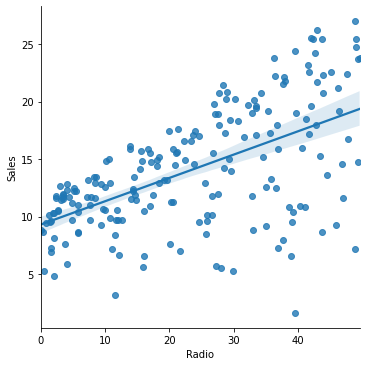

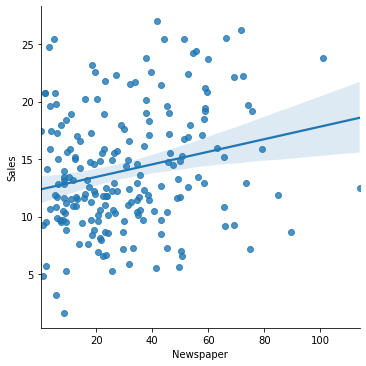

In [70]:
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

# Correlation Matrix

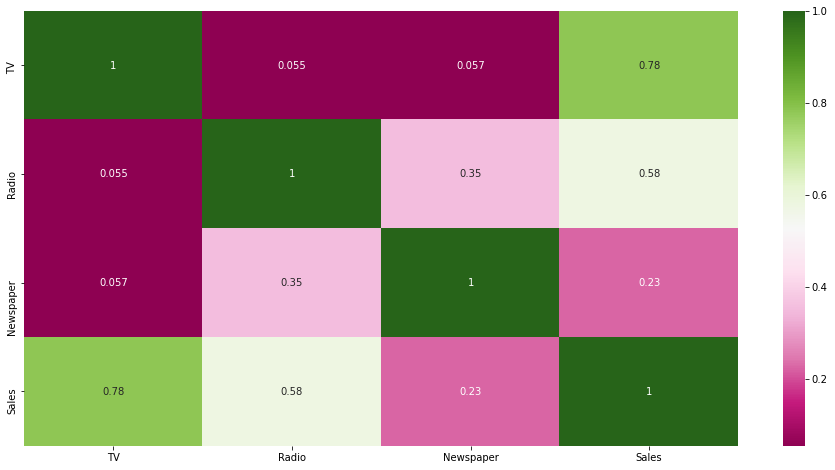

In [72]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')
plt.show()

# Splitting and scaling the data

In [81]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [76]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model and testing results

In [77]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred1))

r2_linear = r2_score(y_test,y_pred1)
print("Root Mean Squared Error:", rmse_linear)
print("R^2: ", r2_linear)

Root Mean Squared Error: 1.921300300759517
R^2:  0.8649018906637791
